In [43]:
import sys, pathlib
sys.path.insert(0, str(pathlib.Path.cwd().parent.parent))  # add repo root
from pathlib import Path
import json
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Load data
Marginal probabilities from "post-processing/sys_probs.json"\
Conditional (upon loss of 1 component) from "post-processing/cond_sys_probs.json"

In [ ]:
DATASET = Path("post-processing") 

# Marginal system probabilities
sys_probs = pd.read_json(DATASET / "sys_probs.json")
print("Marginal system probabilities loaded.")

# Conditional system probabilities
cond_sys_probs = pd.read_json(DATASET / "cond_sys_probs.json")
print("Conditional system probabilities loaded.")

Marginal system probabilities loaded.
Conditional system probabilities loaded.


## Compute robustness index
Robustness index for the system given the loss of one component for the system states:
* System failure
* Partial failure
* Survival

In [54]:
# Load component names
component_names = cond_sys_probs["Component"].tolist()

# Load marginals conditional upon no damage
p_0f = np.array(sys_probs["System failure"])
p_0p = np.array(sys_probs["Partial failure"])
p_0s = np.array(sys_probs["Survival"])

# Load marginals conditional upon the loss of one component
p_1f = np.array(cond_sys_probs["System failure"])
p_1p = np.array(cond_sys_probs["Partial failure"])
p_1s = np.array(cond_sys_probs["Survival"])

# Calculate robustness
Irob = (p_0f/p_1f)**(-p_0f) * (p_0p/p_1p)**(-p_0p) * (p_0s/p_1s)**(-p_0s)
print("Robustness indices calculated.")

# Store robustness indices in a DataFrame
df_Irob = pd.DataFrame({
    "Component": component_names,
    "Robustness Index": Irob,
    "System failure | No damage": np.repeat(p_0f,len(component_names)),
    "Partial failure | No damage": np.repeat(p_0p,len(component_names)),
    "System survival | No damage": np.repeat(p_0s,len(component_names)),
    "System failure | 1 component lost": p_1f,
    "Partial failure | 1 component lost": p_1p,
    "System survival | 1 component lost": p_1s
})


Robustness indices calculated.


## Plot histogram of robustness indices

(array([  1.,   0.,   0.,   0.,   0.,   0.,   1.,   1.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   2.,   0.,   2.,   4., 118.]),
 array([0.99179951, 0.99196352, 0.99212753, 0.99229154, 0.99245555,
        0.99261956, 0.99278357, 0.99294758, 0.99311159, 0.9932756 ,
        0.99343961, 0.99360362, 0.99376763, 0.99393163, 0.99409564,
        0.99425965, 0.99442366, 0.99458767, 0.99475168, 0.99491569,
        0.9950797 , 0.99524371, 0.99540772, 0.99557173, 0.99573574,
        0.99589975, 0.99606376, 0.99622777, 0.99639178, 0.99655579,
        0.9967198 , 0.99688381, 0.99704782, 0.99721183, 0.99737584,
        0.99753985, 0.99770386, 0.99786787, 0.99803188, 0.99819588,
        0.99835989, 0.9985239 , 0.99868791, 0.99885192, 0.99901593,
        0.99917994, 0.99934395, 0.99950796, 0.

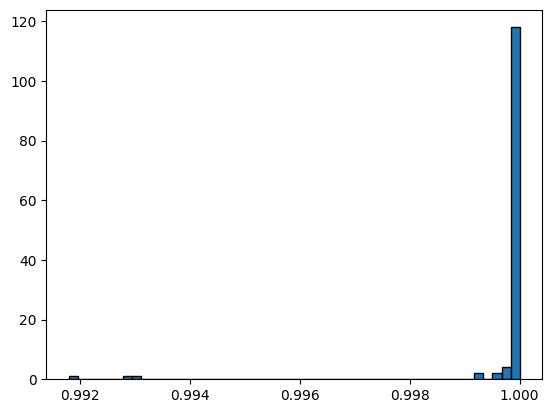

In [49]:
plt.hist(Irob, bins=50, edgecolor='black')